In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("uber.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'uber.csv'

In [3]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<Axes: >

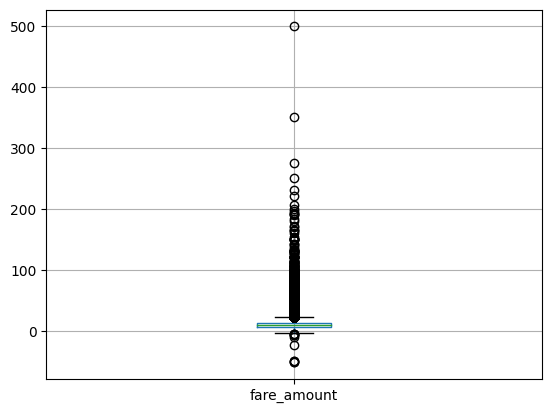

In [6]:
col=['fare_amount']
df.boxplot(col)

In [7]:
#correlation
df.corr(numeric_only=True)

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000587,0.000230,-0.000341,0.000270,0.000271,0.002259
fare_amount,0.000587,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.000230,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.000341,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002259,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


# Linear Regression

In [8]:
X=df[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]]
Y=df['fare_amount']
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.999817,40.738354,-73.999512,40.723217
1,-73.994355,40.728225,-73.994710,40.750325
2,-74.005043,40.740770,-73.962565,40.772647
3,-73.976124,40.790844,-73.965316,40.803349
4,-73.925023,40.744085,-73.973082,40.761247
...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297
199996,-73.984722,40.736837,-74.006672,40.739620
199997,-73.986017,40.756487,-73.858957,40.692588
199998,-73.997124,40.725452,-73.983215,40.695415


In [9]:
Y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199999, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
160915,-73.979616,40.739965,-73.987556,40.749456
103664,-73.989030,40.748457,-73.982843,40.758383
22270,-73.974126,40.763606,-73.995959,40.696013
16561,-73.982265,40.763140,-73.991310,40.750130
199285,-73.992042,40.750660,-73.977938,40.754625
...,...,...,...,...
81665,-73.994192,40.750388,-73.982188,40.770962
15051,-73.982278,40.764303,-73.963622,40.759935
7581,-73.994213,40.751367,-73.997497,40.742370
88972,-73.990877,40.756497,-73.956465,40.776455


In [11]:
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
96191,-73.976154,40.748614,-73.995183,40.717904
153655,-73.999645,40.721987,-73.955480,40.776197
195454,-73.983165,40.771257,-73.991675,40.759674
10760,-73.958907,40.783437,-73.980377,40.765378
186532,-73.946590,40.776755,-73.976737,40.788483
...,...,...,...,...
119605,-73.990182,40.730548,-73.986521,40.739934
2187,0.000000,0.000000,0.000000,0.000000
110305,0.000000,0.000000,0.000000,0.000000
49966,-73.991800,40.764614,-73.953610,40.804599


In [12]:
Y_train

160915     8.5
103664     5.7
22270     25.5
16561      6.1
199285     4.9
          ... 
81665     11.5
15051      6.2
7581       4.9
88972      9.7
38326     25.3
Name: fare_amount, Length: 139999, dtype: float64

In [13]:
Y_test

96191     12.0
153655    23.0
195454     4.9
10760      9.3
186532     8.5
          ... 
119605     4.1
2187      10.5
110305     6.1
49966     14.9
59751      6.9
Name: fare_amount, Length: 60000, dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
prediction=lr.predict(X_test)

In [15]:
prediction

array([11.35619372, 11.35542762, 11.35576378, ..., 11.74962146,
       11.35517003, 11.35597579])

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators = 5, random_state = 101) #n_estimators is no of decision tree
rf.fit(X_train,Y_train)
prediction_rf=rf.predict(X_test)

In [21]:
prediction_rf

array([12.5       , 14.5       ,  7.5       , ..., 11.79478126,
       14.        ,  8.5       ])

# RMSE

In [22]:
from sklearn.metrics import mean_squared_error
rmse_lr=np.sqrt(mean_squared_error(prediction,Y_test))
rmse_rf=np.sqrt(mean_squared_error(prediction_rf,Y_test))
rmse_lr

9.814808131455209

In [23]:
rmse_rf

6.8905991882190705